For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.<br>
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").<br>
int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.<br>
installment: The monthly installments owed by the borrower if the loan is funded.<br>
log.annual.inc: The natural log of the self-reported annual income of the borrower.<br>
dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).<br>
fico: The FICO credit score of the borrower.<br>
days.with.cr.line: The number of days the borrower has had a credit line.<br>
revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).<br>
revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).<br>
inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.<br>
delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.<br>
pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("loan_data.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
data.tail(50)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9528,0,all_other,0.1062,146.52,10.621327,7.02,707,8013.000000,2282,69.2,4,0,0,1
9529,0,debt_consolidation,0.1099,98.21,11.082143,19.57,687,7350.000000,237551,36.9,0,0,0,0
9530,0,credit_card,0.1099,425.56,11.571194,16.36,722,7500.041667,22354,65.6,4,0,0,0
9531,0,major_purchase,0.2017,149.01,10.596635,12.39,677,3140.041667,200,13.3,10,3,0,0
9532,0,debt_consolidation,0.1273,335.67,10.404263,19.05,702,6480.041667,8853,37.5,4,0,1,0
9533,0,debt_consolidation,0.1533,870.71,11.856515,23.82,707,4800.000000,259128,94.4,0,0,0,0
9534,0,debt_consolidation,0.1136,625.32,10.985293,8.95,732,3750.041667,18995,62.9,4,0,0,0
9535,0,small_business,0.1496,831.52,12.765688,11.38,717,8520.041667,1207359,56.0,7,0,0,1
9536,0,small_business,0.1348,542.79,12.611538,3.12,737,7410.041667,211931,10.0,7,2,0,1
9537,0,debt_consolidation,0.1607,114.38,10.649986,16.64,672,5910.000000,11854,71.9,7,0,1,0


In [4]:
# Contains 9578 rows, and 14 columns in total
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


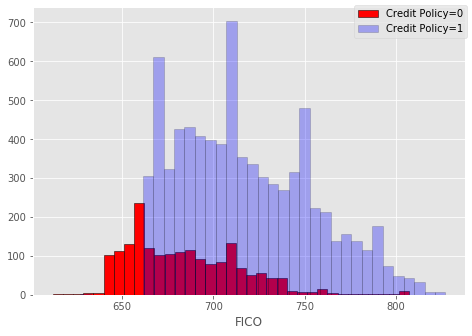

In [106]:
plt.style.use('ggplot')

figure = plt.figure(figsize=(6, 4))
axes = figure.add_axes([0.1, 0.1, 1, 1])
plt.xlabel("FICO")

cp1 = data[data['credit.policy'] == 1]
cp0 = data[data['credit.policy'] == 0]

#cp1['fico'].plot(kind="hist", bins=30, label="Credit Policy=1", alpha=.4)
#cp0['fico'].plot(kind="hist", bins=30, label="Credit Policy=0")

cp0['fico'].hist(bins=35, label="Credit Policy=0", ec='black', color="red")
cp1['fico'].hist(bins=35, label="Credit Policy=1", alpha=.3, ec='black', color="blue")

figure.legend()


# This plot shows that there are more people with credit policy that people without credit policy
# People who have a FICO score lower than 660 automatically have a credit policy of 0
# There are people who have a FICO score over 660, and they still have a credit policy of 0; 
#    therefore, this could be caused by other factors

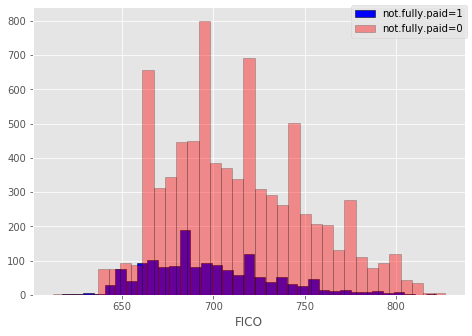

In [87]:
figure = plt.figure()
axes = figure.add_axes([0.1, 0.1, 1, 1])
plt.xlabel("FICO")

nfp0 = data[data['not.fully.paid'] == 0]
nfp1 = data[data['not.fully.paid'] == 1]

nfp1['fico'].hist(bins=35, label="not.fully.paid=1", ec="black", color="blue")
nfp0['fico'].hist(bins=35, label="not.fully.paid=0", alpha=.4, ec="black", color="red")

figure.legend()

# This plot shows that more people the loan they burrowed than people who did not

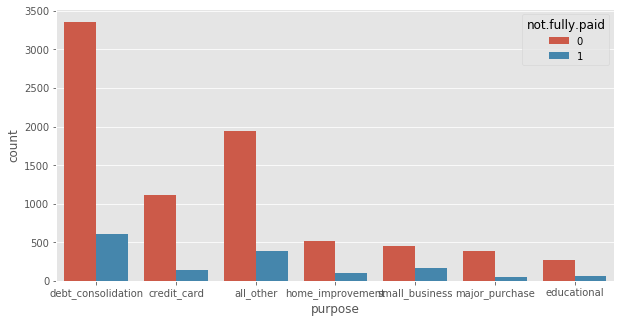

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(x="purpose", data=data, hue="not.fully.paid")

# The plot below shows that most debts are carried out because of debt consolidation, and 
# a lot of these people have paid the loan they burrowed

# All other purposes seems to be second most popular choice of burrowing a loan
# This can be because of wedding, funeral, etc

# Overall, a more people have paid for the loan they burrowed - which is a good thing!

<Figure size 720x360 with 0 Axes>

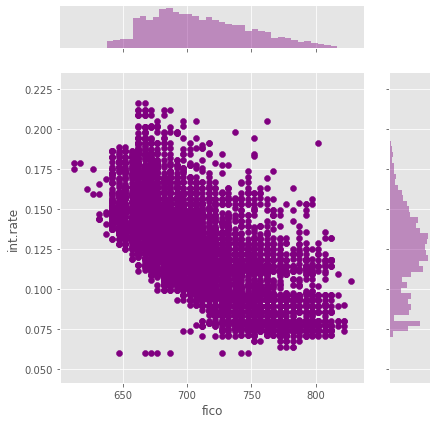

In [110]:
# This plot shows that as FICO increases, the interest rate decreases
plt.figure(figsize=(10,5))
sns.jointplot(x="fico",y="int.rate",data=data, color="purple")

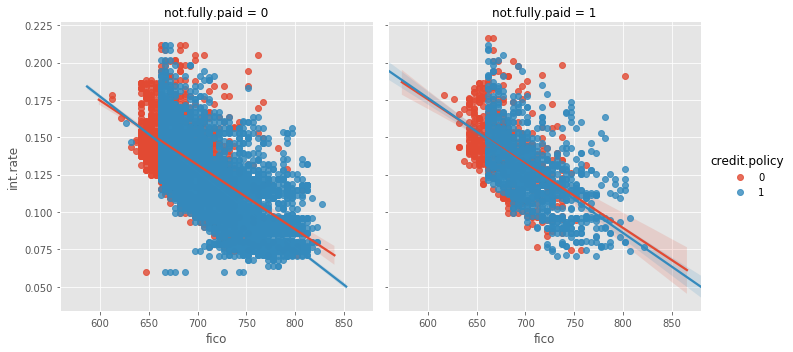

In [104]:
# This plot shows that the behaviour seems to be similar for both credit policy 
sns.lmplot(x="fico",y="int.rate",data=data, hue="credit.policy", col="not.fully.paid")

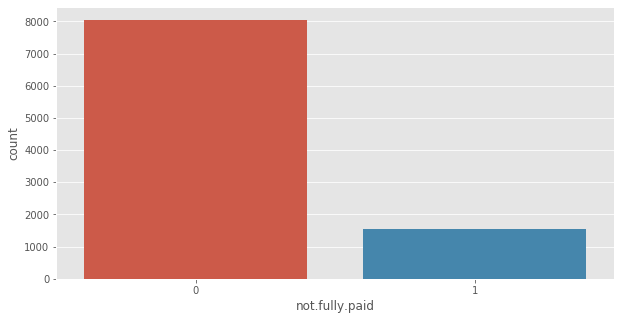

In [108]:
# The plot below shows that around 8000 people have paid for the loan they burrowed
# On the other hand, around 1500 people still have not paid for the loan they burrowed
plt.figure(figsize=(10,5))
sns.countplot("not.fully.paid", data=data)

C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


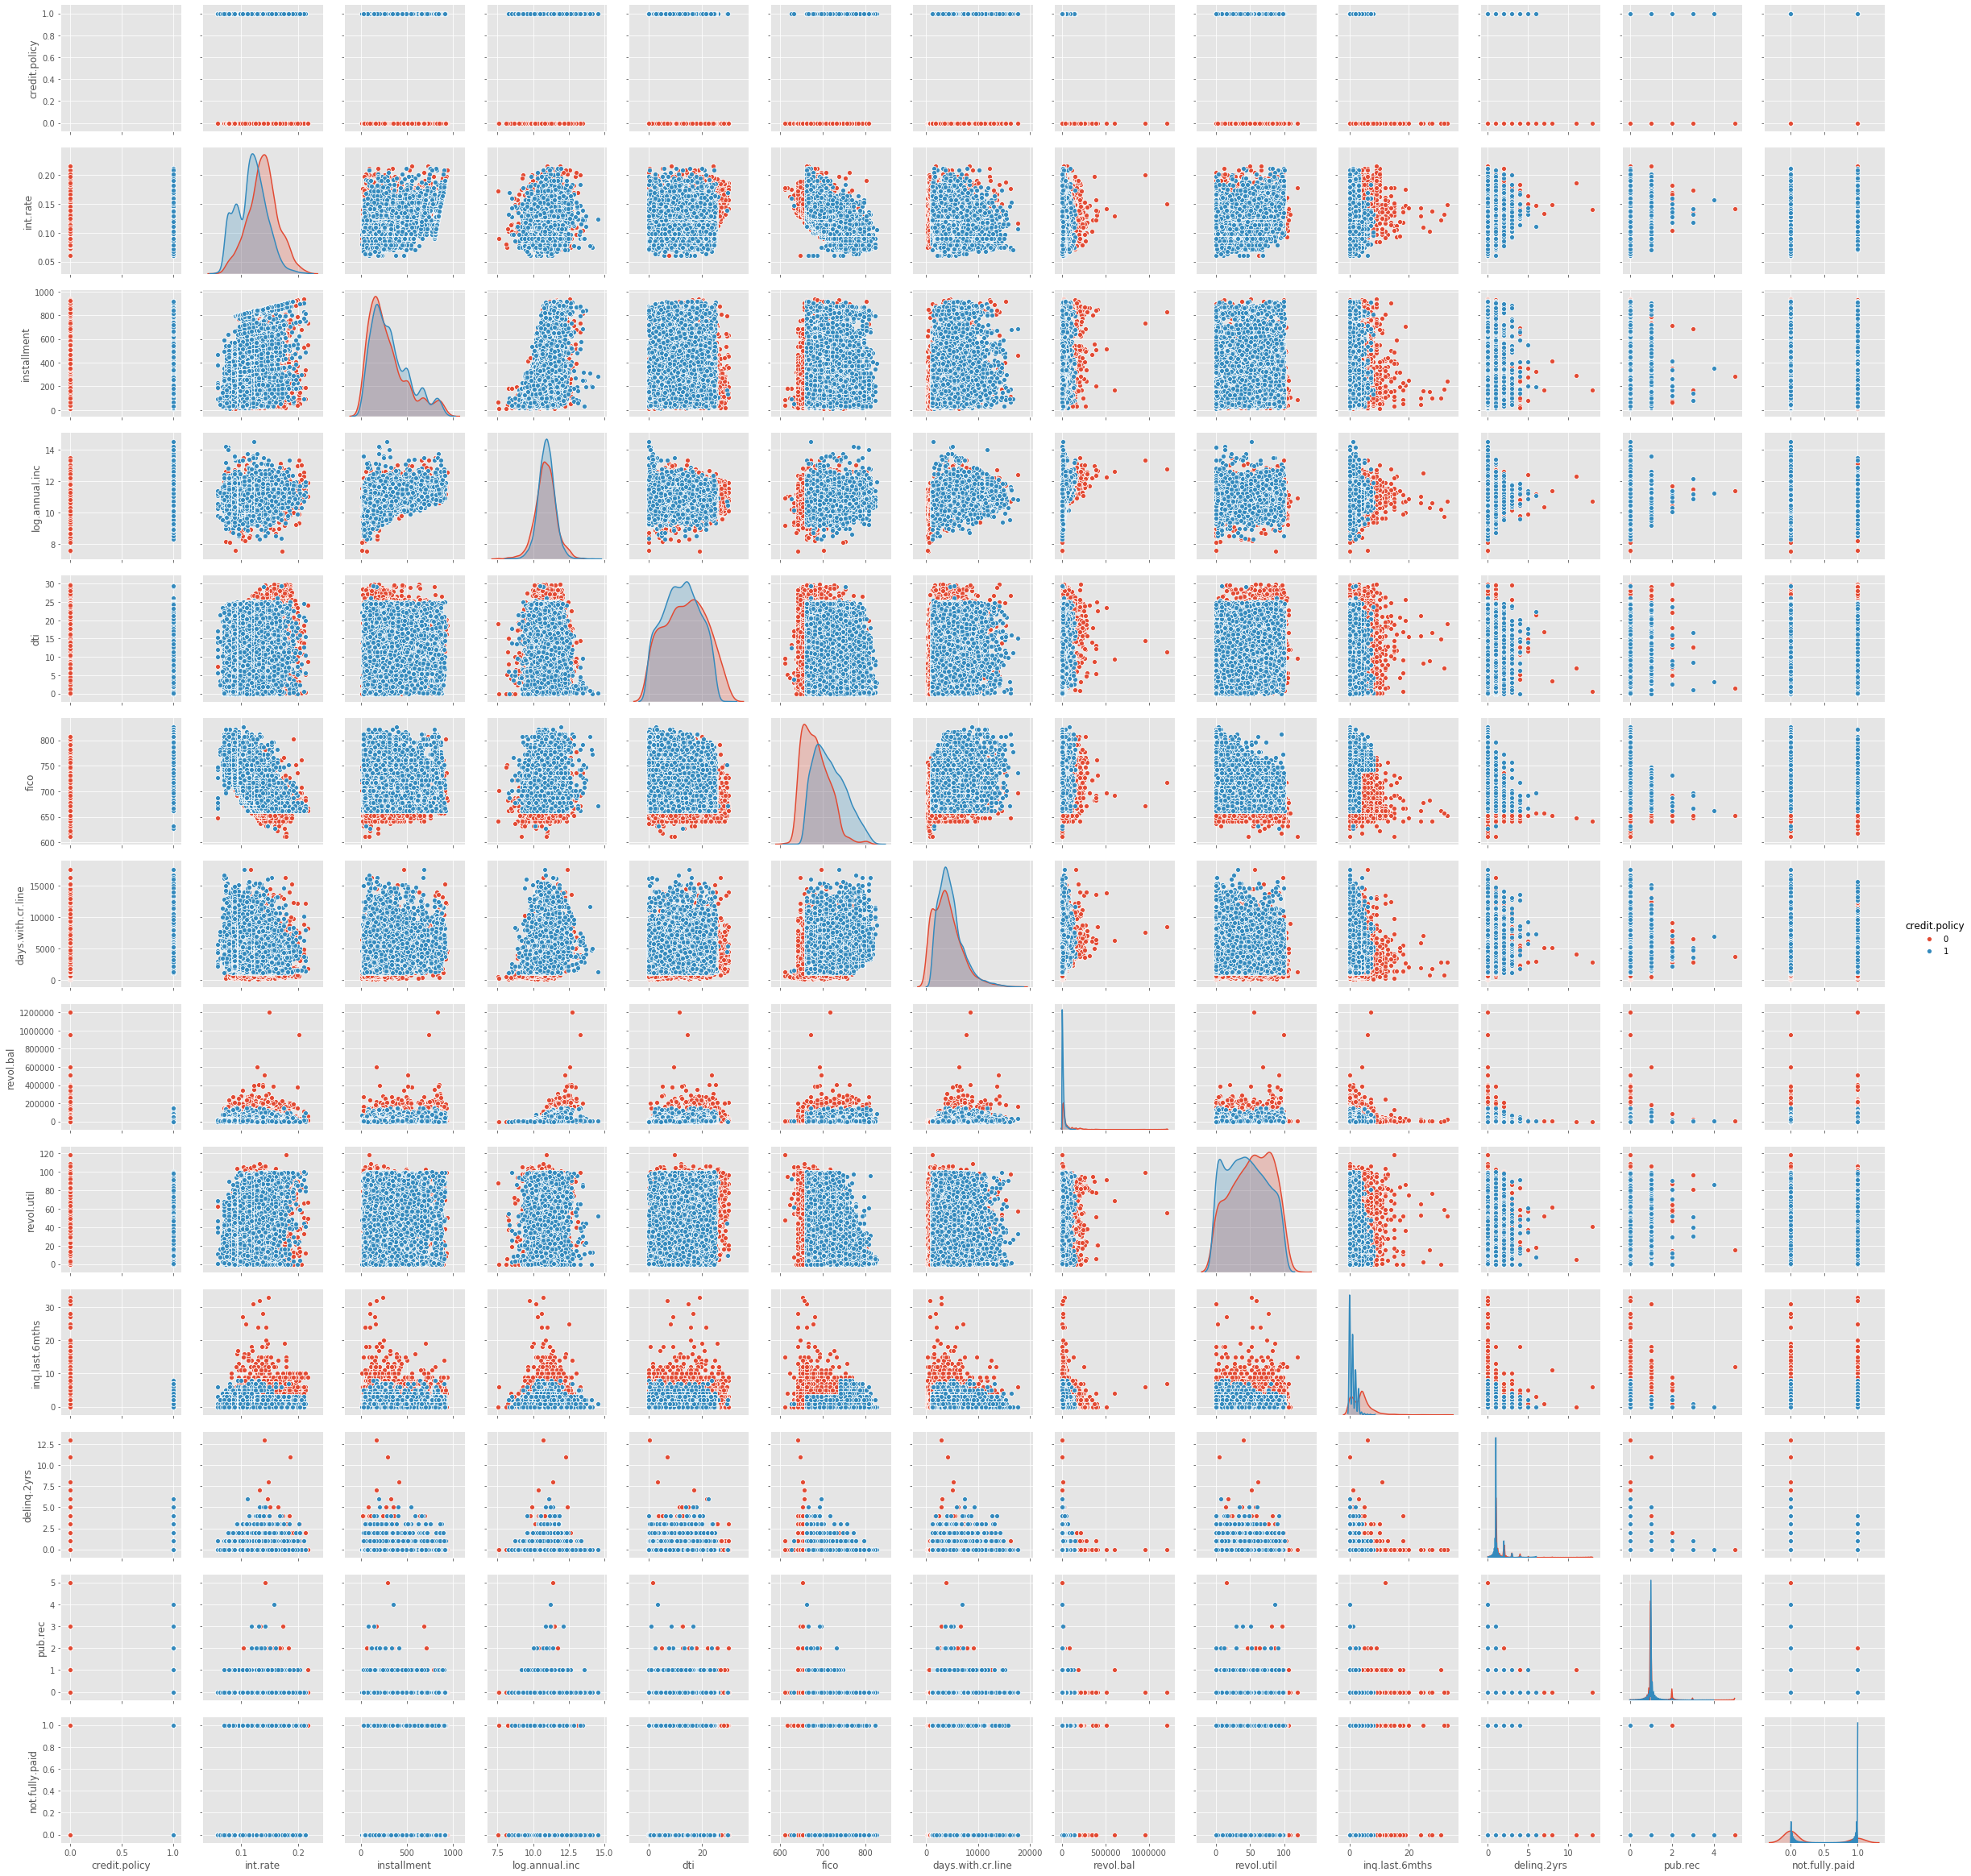

In [112]:
sns.pairplot(data, hue="credit.policy")

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [115]:
pd.get_dummies(data, drop_first=True)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [116]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [117]:
# Create the dataset
cat_feats = ['purpose']
final_data = pd.get_dummies(data, columns=cat_feats, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [118]:
final_data.drop('credit.policy', axis=1)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [119]:
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [120]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [121]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2434
           1       0.21      0.25      0.23       440

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.74      0.75      2874

[[2026  408]
 [ 330  110]]
0.7432150313152401


In [124]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2434
           1       0.50      0.01      0.03       440

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.47      2874
weighted avg       0.80      0.85      0.78      2874

[[2428    6]
 [ 434    6]]
0.8469032707028532


In [125]:
# Overall the Random Forest algorithm performed better than the Decision Tree algorithm
# The accuracy went up by 10

# However, the Random Forest algorithm did worse in certain parts
#    For example, its recall and f1 scores are worse than the Decision Tree algorithm
#    This also explains why there are a lot of False Negatives because the recall score is poor!